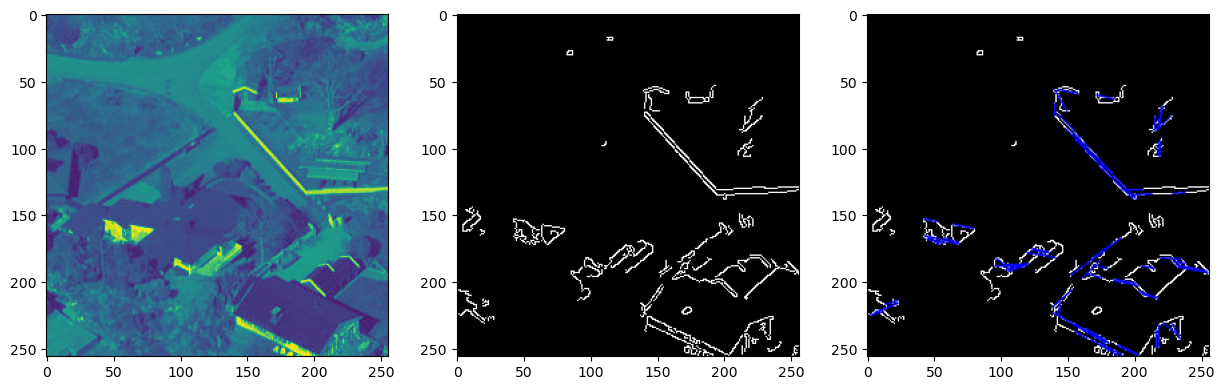

In [2]:
import matplotlib.pyplot as plt
from PIL import Image, ExifTags, ImageFilter
import numpy as np
import math
import cv2 as cv

filename = 'images/Bakoverrettede bilder/30196_127_02033_210427_Cam4B.jpg'

src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)




# Edge detection
# dst = cv.Canny(src, 200, 500, 3)



# # # Copy edges to the images that will display the results in BGR
# cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
# cdstP = np.copy(cdst)

# # lines = cv.HoughLines(dst, 2, np.pi / 180, 100, None, 0, 0)

# # if lines is not None:
# #     for i in range(0, len(lines)):
# #         rho = lines[i][0][0]
# #         theta = lines[i][0][1]
# #         a = math.cos(theta)
# #         b = math.sin(theta)
# #         x0 = a * rho
# #         y0 = b * rho
# #         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
# #         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
# #         cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


# linesP = cv.HoughLinesP(dst, 2, np.pi / 180, 30, None, 10, 5)

# if linesP is not None:
#     for i in range(0, len(linesP)):
#         l = linesP[i][0]
#         cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)

# fig = plt.figure(figsize=(15,5))
# fig.add_subplot(1,3,1)
# plt.imshow(src)
# fig.add_subplot(1,3,2)
# plt.imshow(cdst)
# fig.add_subplot(1,3,3)
# plt.imshow(cdstP)

# # cv.imshow("Source", src)
# # cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
# # cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)


('H', 'S', 'V')


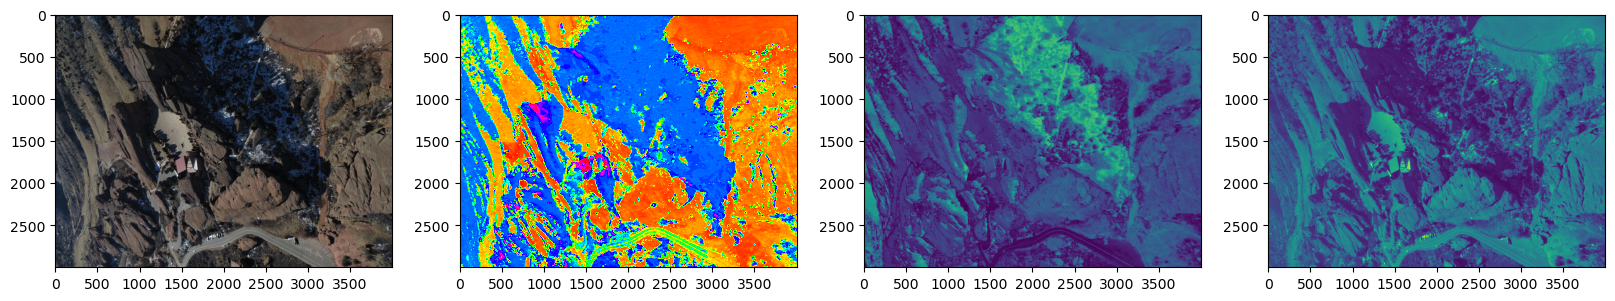

In [83]:

src = Image.open('images/IMG_3580.JPG')
# src = src.crop((800, 1000, 1500, 1700))
src = src.convert('HSV')
print(src.getbands())
hue = src.getchannel('H')
sat = src.getchannel('S')
val = src.getchannel('V')

# hue = np.asarray(hue)
# print(hue < 180)
# hue = hue * (hue > 60)
# hue = hue * (hue < 180)
# print(hue)


fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,4,1)
plt.imshow(src)
fig.add_subplot(1,4,2)
plt.imshow(hue, cmap='hsv')
fig.add_subplot(1,4,3)
plt.imshow(sat)
fig.add_subplot(1,4,4)
plt.imshow(val)


0 255
0.0 135.0


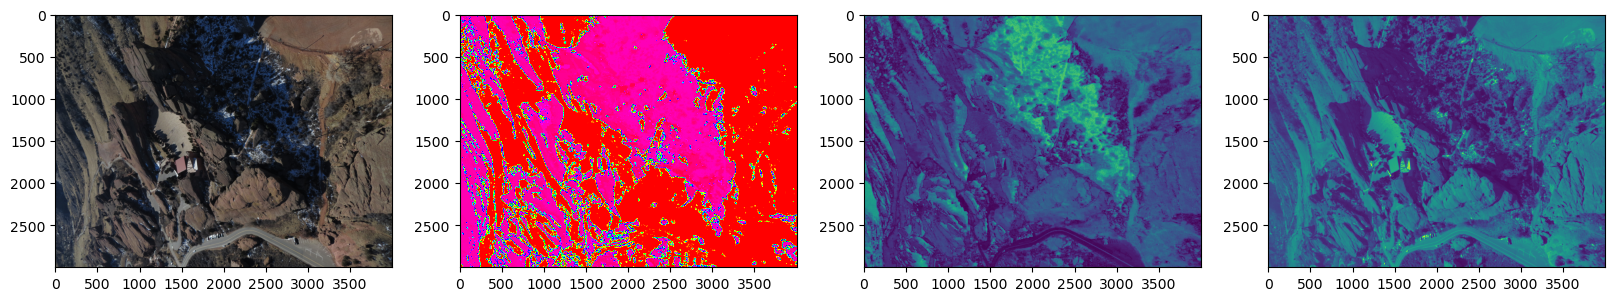

In [68]:
src = plt.imread('images/IMG_3580.JPG')
# src = src.crop((800, 1000, 1500, 1700))

max_rgb = src.max(axis=2)
print(max_rgb.min(), max_rgb.max())

sat = 255 * np.divide(max_rgb - src.min(axis=2), max_rgb, out=np.zeros_like(max_rgb, dtype='float64'), where=max_rgb!=0)
val = max_rgb
r_mask = src.argmax(axis=2) == 0
g_mask = src.argmax(axis=2) == 1
b_mask = src.argmax(axis=2) == 2

s_x_v = sat * val
hue = 30 * np.divide(src[:,:,1] - src[:,:,2] , s_x_v, out=np.zeros_like(s_x_v, dtype='float64'), where=s_x_v!=0) * r_mask
hue = 30 * (2 + np.divide(src[:,:,1] - src[:,:,2], s_x_v, out=np.zeros_like(s_x_v, dtype='float64'), where=s_x_v!=0)) * g_mask
hue = 30 * (4 + np.divide(src[:,:,0] - src[:,:,1], s_x_v, out=np.zeros_like(s_x_v, dtype='float64'), where=s_x_v!=0)) * b_mask
print(hue.min(), hue.max())

fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,4,1)
plt.imshow(src)
fig.add_subplot(1,4,2)
plt.imshow(2*hue, cmap='hsv')
fig.add_subplot(1,4,3)
plt.imshow(sat)
fig.add_subplot(1,4,4)
plt.imshow(val)

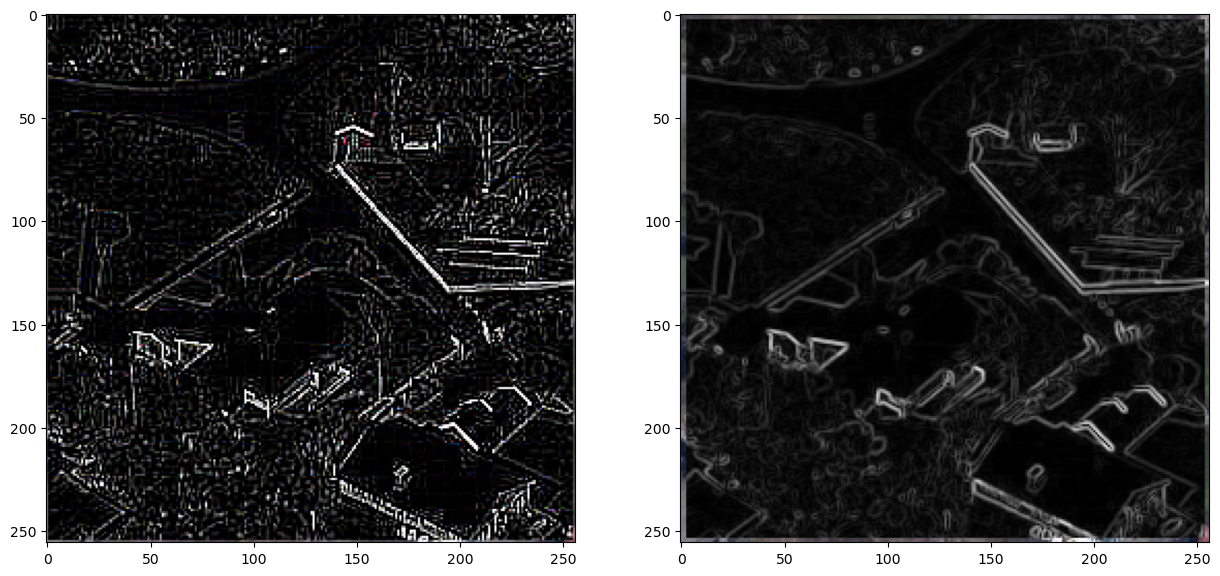

In [32]:


im = Image.open(filename)
im = im.filter(ImageFilter.FIND_EDGES)

fig = plt.figure(figsize=(15,3))
fig.add_subplot(1,2,1)
plt.imshow(im)

img = plt.imread(filename)

#define the vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

#get the dimensions of the image
n,m,d = img.shape

#initialize the edges image
edges_img = img.copy()

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()
fig.add_subplot(1,2,2)
plt.imshow(edges_img, )
plt.show()


In [22]:
image = Image.open('images/IMG_3579.JPG')
image.show()
info = image.getexif()
print(info)
for key, val in info.items():
    if key in ExifTags.TAGS:
        print(f'{ExifTags.TAGS[key]}:{val}')
    elif key in ExifTags.GPSTAGS:
        print(f'{ExifTags.GPSTAGS[key]}:{val}')
    else:
        print(f'{key}: {val}')

{296: 2, 282: 180.0, 34853: 4942, 34665: 246, 270: '                               ', 271: 'Canon', 272: 'Canon PowerShot SX260 HS', 274: 6, 306: '2013:01:18 12:19:34', 531: 2, 283: 180.0}
GPSInfo:4942
ResolutionUnit:2
ExifOffset:246
ImageDescription:                               
Make:Canon
Model:Canon PowerShot SX260 HS
Orientation:6
DateTime:2013:01:18 12:19:34
YCbCrPositioning:2
XResolution:180.0
YResolution:180.0
